Satellite images are images of the Earth that are collected by the imaging satellites which are operated by the government and businesses all around the world.

In this project, we will perform satellite imagery analysis over the Sundarbans forest in India. The Google map below shows the Sundarbans region. 

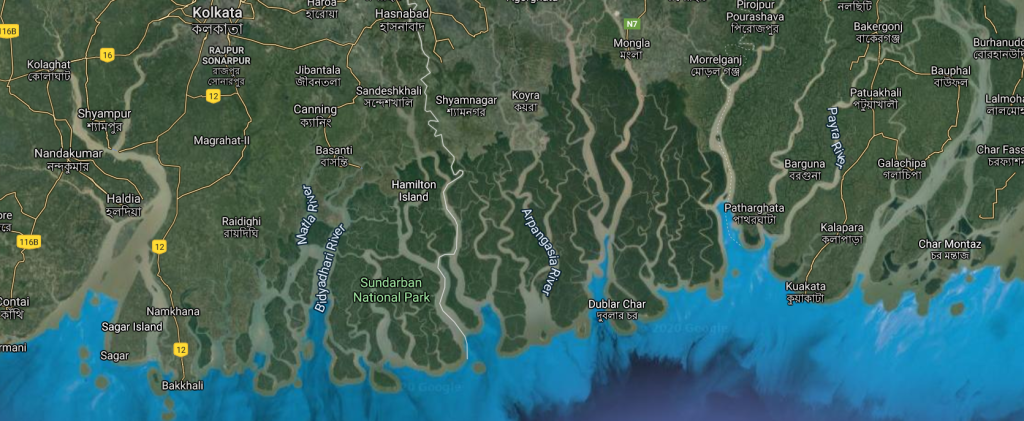

The Sundarbans are one of the largest mangrove areas in the delta formed by the confluence of the Ganges, Brahmaputra and Meghna rivers in the Bay of Bengal. The Sundarbans Forest stretches approximately 10,000 km sq across India and Bangladesh, 40% of which is found in India and is home to many rare and globally threatened wildlife. 

In this file, we will be using a very small part of the Sundarbans region for analyzing satellite imagery. We’ll be using a small portion of the Sundarbans satellite data that is acquired using the Sentinel-2 satellite.

The dataset we are using is in the form of `954×298` pixels, with **12 bands with a spectral resolution** varying from **10 to 60 meters**.

In [3]:
# !pip install pipwin --user
# !pipwin install gdal
!pip install earthpy

     |████████████████████████████████| 1.4 MB 10.7 MB/s 
     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 1.0 MB 30.5 MB/s 
     |████████████████████████████████| 15.4 MB 40 kB/s 
     |████████████████████████████████| 6.3 MB 28.8 MB/s 


In [4]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

In [5]:
np.seterr(divide='ignore', invalid='ignore')
S_sentinel_bands = glob("sundarbans_data/*B?*.tiff")
S_sentinel_bands.sort()

As we stated above that the dataset contains 12 bands now let’s visualize them to see what we are going to work with:

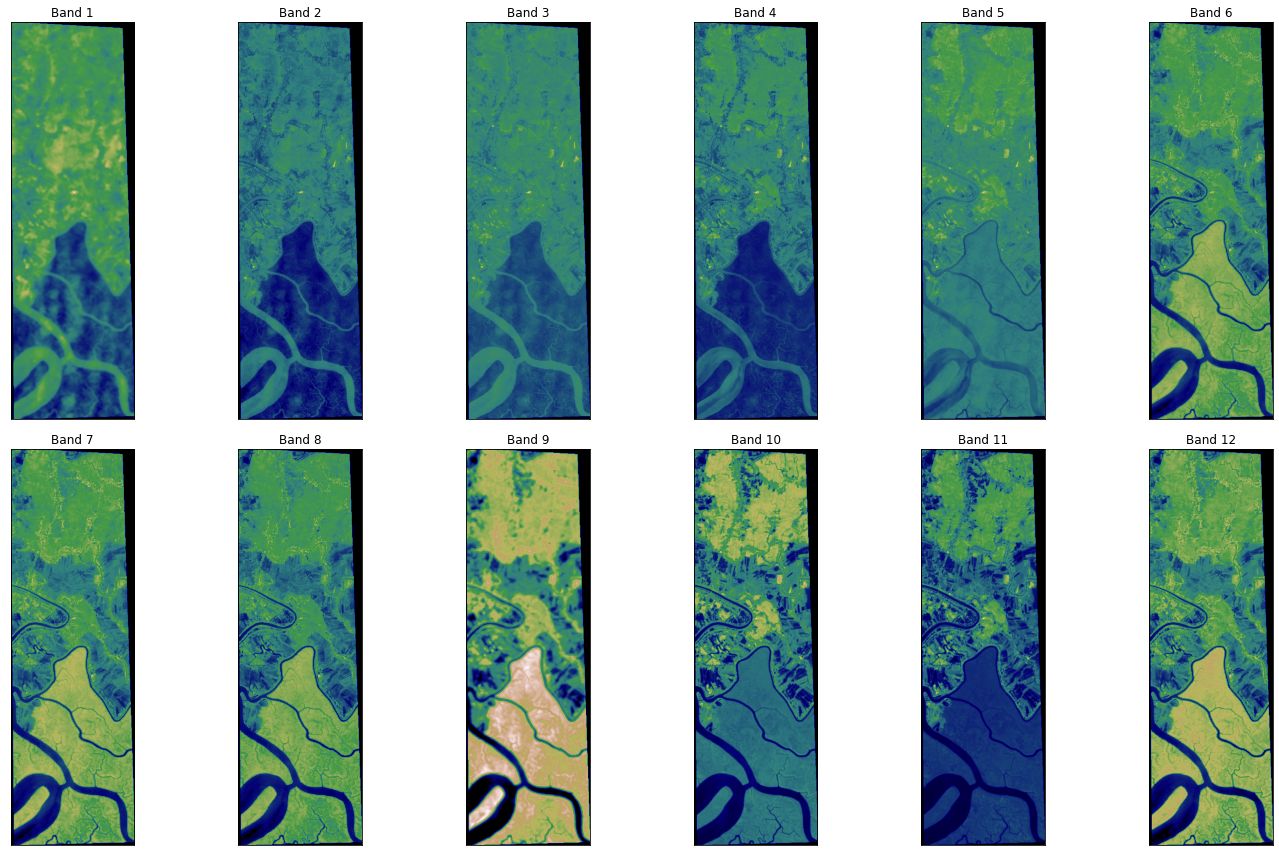

In [6]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))
arr_st = np.stack(l)
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

This dataset has several numbers of bands that contain data ranging from visible to infrared. It is therefore difficult to visualize the data for humans. Creating an RGB composite image facilitates an effective understanding of the data:

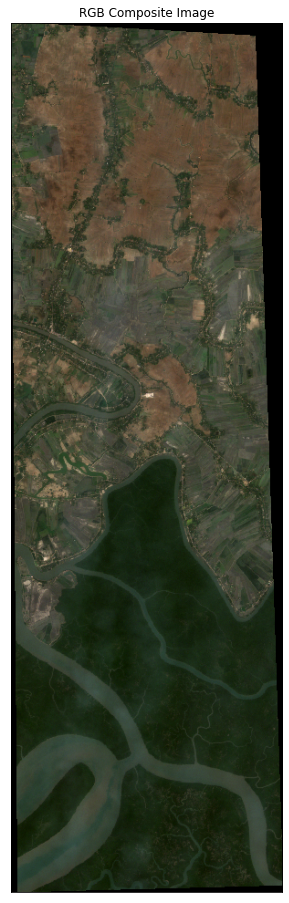

In [10]:
rgb = ep.plot_rgb(arr_st, rgb=(3,2,1), figsize=(10, 16), title='RGB Composite Image')
plt.show()

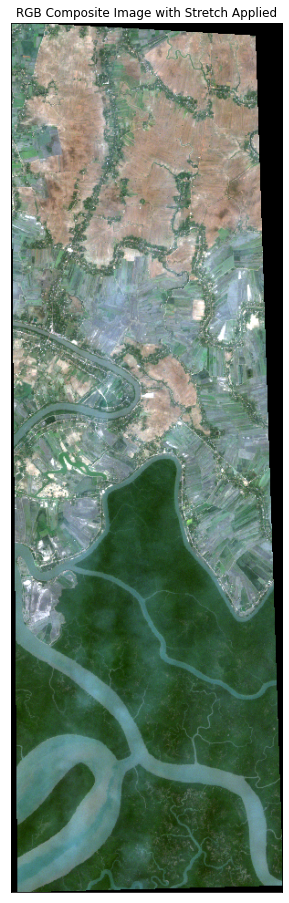

In [11]:
ep.plot_rgb(arr_st,rgb=(3, 2, 1),stretch=True,str_clip=0.2,figsize=(10, 16),
             title="RGB Composite Image with Stretch Applied")

plt.show()

Now let’s visualize the histogram of the dataset which will help us to understand the distribution of the values of the bands:

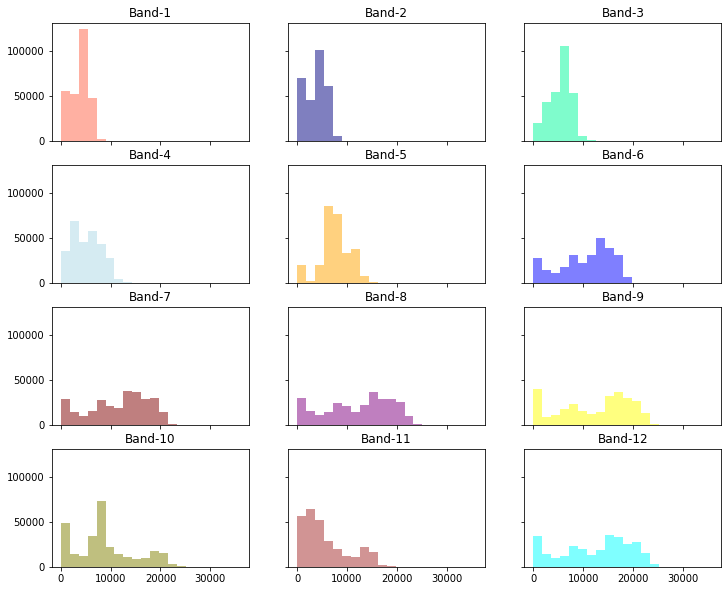

In [12]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, colors = colors,title=[f'Band-{i}' for i in range(1, 13)], cols=3, alpha=0.5, figsize = (12, 10))

plt.show()

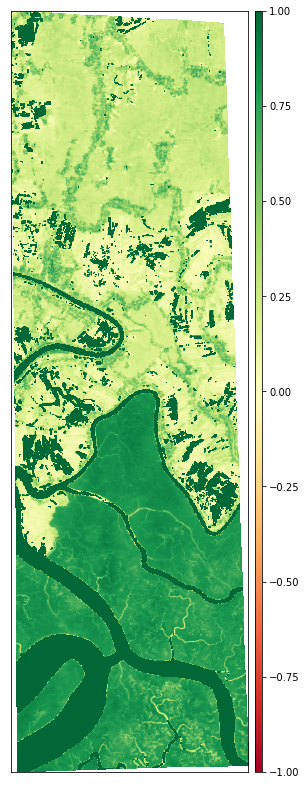

In [13]:
# Analyzing the Vegetation Index: The vegetation of the Sundarbans region:
ndvi = es.normalized_diff(arr_st[7], arr_st[3])
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

* When we have negative values it is probably water. 
* On the other hand, if we have an NDVI value close to +1, it may be dense green leaves. 
* But when the NDVI is close to zero, there are no green leaves and it might even be an urbanized area.